In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('Training Dataset/training datalist.csv')
display(df.head())
df.reset_index(drop=True, inplace=True)

,ID,Sex,Age,Disease category,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,...,Onset of dysphonia,Noise at work,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10
0,1202f15,2,39,1,1,1,1,1,1,0,...,2,3,1,0,0,0,0,0,0,22.0
1,0600ve0,1,69,2,1,1,1,1,0,0,...,2,1,3,0,0,0,0,0,1,19.0
2,1001o7l,2,59,2,1,1,1,1,0,0,...,2,3,4,0,0,0,0,0,0,18.0
3,1201c1t,2,47,1,1,0,1,1,1,0,...,3,1,1,0,0,0,0,0,0,27.0
4,0402jvt,1,87,1,0,0,0,0,0,0,...,1,1,4,0,1,0,0,0,0,16.0


In [23]:
# data cleaning
df['PPD'].fillna(0, inplace=True)
df.dropna(subset=['Voice handicap index - 10'], inplace=True)
# df.info()

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['ID', 'Disease category'], axis=1)
y = df['Disease category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler().fit(X_train.values)
X_train_norm = scaler.transform(X_train.values)
X_test_norm = scaler.transform(X_test.values)

In [25]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class="multinomial", solver='lbfgs')
lr_model.fit(X_train_norm, y_train.values)

y_pred = lr_model.predict(X_test_norm)

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test.values, y_pred)
precision = precision_score(y_test.values, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test.values, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test.values, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy.round(2)}")
print(f"Precision: {precision.round(2)}")
print(f"Recall: {recall.round(2)}")
print(f"F1: {f1.round(2)}")

print(classification_report(y_test.values, y_pred, zero_division=1))
print(confusion_matrix(y_test.values, y_pred))

Accuracy: 0.63
Precision: 0.63
Recall: 0.63
F1: 0.62
              precision    recall  f1-score   support

           1       0.70      0.86      0.77       153
           2       0.45      0.41      0.43        64
           3       0.79      0.46      0.58        59
           4       0.08      0.09      0.09        11
           5       0.43      0.27      0.33        11

    accuracy                           0.63       298
   macro avg       0.49      0.42      0.44       298
weighted avg       0.63      0.63      0.62       298

[[131  12   3   4   3]
 [ 31  26   4   2   1]
 [ 13  14  27   5   0]
 [  4   6   0   1   0]
 [  8   0   0   0   3]]


In [27]:
# Get feature importance
coefficients = lr_model.coef_[0]

feature_names = X_train.columns.to_list()

coefficients_dict = dict(zip(feature_names, coefficients))

sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

print("Feature Importance for Logistic Regression")
for feature, coef in sorted_coefficients:
    print(f"{feature}: {coef}")


Feature Importance for Logistic Regression
Occupational vocal demand: -0.6534244682313365
Sex: 0.6182529905805284
Head and Neck Cancer: -0.45959243551245865
PPD: 0.38972131199869015
frequency: 0.3645083489186531
Onset of dysphonia : -0.24994096319869252
Decreased volume: -0.2487775403177943
Narrow pitch range: 0.2329795052964812
Noise at work: 0.2220996451517494
Drinking: -0.1915076259492189
Diurnal pattern: -0.14495240807235674
Voice handicap index - 10: -0.13729344515216635
CVA: 0.1355750891461165
Choking: -0.1261813364231961
PND: 0.1080954486131897
Hypertension: 0.09862059654207077
Smoking: 0.0906117880290253
Age: 0.08255922172528864
Diabetes: -0.05489492678276176
Dryness: 0.044779876538383875
Head injury: 0.043499787608386145
heartburn: 0.03918113288206709
Lumping: 0.02456362850981507
Fatigue: -0.014464140913696476
Eye dryness: -0.01036950389516288
CAD: -0.0074491712502824286


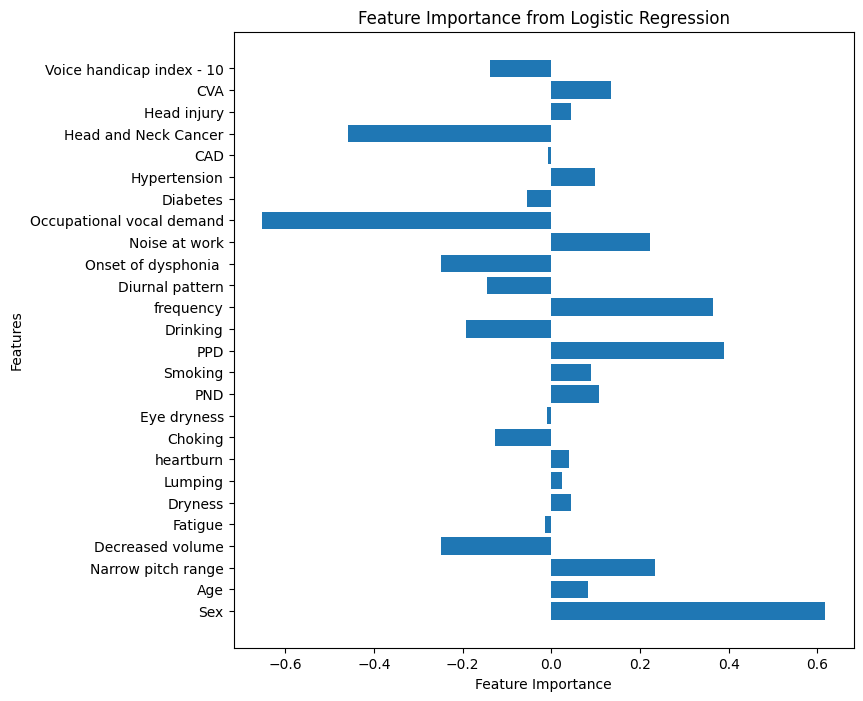

In [28]:
import matplotlib.pyplot as plt

coefficients = lr_model.coef_[0]

plt.figure(figsize=(8, 8))
plt.barh(X.columns, coefficients)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Logistic Regression')
plt.show()


In [29]:
# Get the top 10 features name
top_10_features = [feature[0] for feature in sorted_coefficients[:10]]
print(top_10_features)

['Occupational vocal demand', 'Sex', 'Head and Neck Cancer', 'PPD', 'frequency', 'Onset of dysphonia ', 'Decreased volume', 'Narrow pitch range', 'Noise at work', 'Drinking']


In [30]:
# Get the least 5 features name
least_5_features = [feature[0] for feature in sorted_coefficients[-5:]]
print(least_5_features)

['heartburn', 'Lumping', 'Fatigue', 'Eye dryness', 'CAD']
